<a href="https://colab.research.google.com/github/aditya-malte/Simple-LP1-Codes/blob/master/DA2(without_Sklearn_Naive_bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Download the Pima Dataset from kagggle:
https://www.kaggle.com/uciml/pima-indians-diabetes-database/download

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [29]:
data = pd.read_csv("diabetes.csv")

In [30]:
#columns = data.columns

In [31]:
#columns = [col_name for col_name in columns if not col_name=="Outcome"]

In [32]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


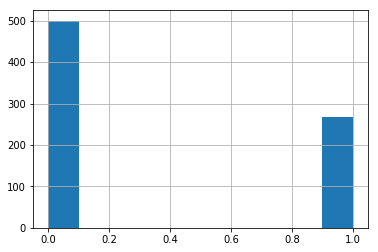

In [33]:
data["Outcome"].hist()

In [34]:
y = data["Outcome"]
X = data.drop(["Outcome"], axis=1)

In [35]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [36]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [37]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [38]:
train_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
528,0,117,66,31,188,30.8,0.493,22
537,0,57,60,0,0,21.7,0.735,67
409,1,172,68,49,579,42.4,0.702,28
668,6,98,58,33,190,34.0,0.430,43
72,13,126,90,0,0,43.4,0.583,42


In [39]:
train_y.head()

528    0
537    0
409    1
668    0
72     1
Name: Outcome, dtype: int64

In [40]:
test_X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
100,1,163,72,0,0,39.0,1.222,33
643,4,90,0,0,0,28.0,0.610,31
695,7,142,90,24,480,30.4,0.128,43
661,1,199,76,43,0,42.9,1.394,22
571,2,130,96,0,0,22.6,0.268,21


In [41]:
test_y.head()

100    1
643    0
695    1
661    1
571    0
Name: Outcome, dtype: int64

In [42]:
#generate summary
train_mean_pos = train_X[train_y==1].mean()
train_std_pos = train_X[train_y==1].std()
train_mean_neg = train_X[train_y==0].mean()
train_std_neg = train_X[train_y==0].std()

In [43]:
train_mean_pos

Pregnancies                   5.244681
Glucose                     141.250000
BloodPressure                71.755319
SkinThickness                21.776596
Insulin                     102.781915
BMI                          35.085638
DiabetesPedigreeFunction      0.516527
Age                          37.771277
dtype: float64

In [44]:
train_std_pos

Pregnancies                   3.648122
Glucose                      29.810924
BloodPressure                20.185337
SkinThickness                17.352683
Insulin                     143.018978
BMI                           7.211248
DiabetesPedigreeFunction      0.325736
Age                          10.857651
dtype: float64

In [45]:
train_mean_neg

Pregnancies                   3.286533
Glucose                     110.974212
BloodPressure                68.232092
SkinThickness                19.722063
Insulin                      69.074499
BMI                          30.149284
DiabetesPedigreeFunction      0.445103
Age                          31.252149
dtype: float64

In [46]:
train_std_neg

Pregnancies                  3.002560
Glucose                     25.048847
BloodPressure               17.831443
SkinThickness               14.804865
Insulin                     94.533976
BMI                          7.886281
DiabetesPedigreeFunction     0.311236
Age                         11.763695
dtype: float64

In [47]:
summary = { "train_mean_pos": train_mean_pos.tolist() , "train_std_pos": train_std_pos.tolist(), 
           "train_mean_neg": train_mean_neg.tolist(), "train_std_neg": train_std_neg.tolist()}

In [48]:
summary

{'train_mean_pos': [5.24468085106383,
  141.25,
  71.75531914893617,
  21.77659574468085,
  102.78191489361703,
  35.085638297872315,
  0.516526595744681,
  37.77127659574468],
 'train_std_pos': [3.648122131284128,
  29.81092377754484,
  20.185337067235718,
  17.352682762162722,
  143.0189781825397,
  7.211247610765149,
  0.32573601452793266,
  10.85765086557896],
 'train_mean_neg': [3.286532951289398,
  110.97421203438395,
  68.23209169054441,
  19.722063037249285,
  69.07449856733524,
  30.149283667621745,
  0.44510315186246396,
  31.25214899713467],
 'train_std_neg': [3.0025595904922593,
  25.048846986811697,
  17.83144263581405,
  14.80486485307629,
  94.53397587605545,
  7.886280885787125,
  0.3112360705766095,
  11.76369474470932]}

In [49]:
import numpy as np
def cond_prob(x, mn, stddv):  #value , mean, standard dev| this is that fancy formula: 1/root(sigma^2)....
    varnc = stddv*stddv
    p = 1/(np.sqrt(2*np.pi*varnc)) * np.exp((-(x-mn)**2)/(2*varnc))
    return p


In [50]:
def predict(row, summary):

  #prior probability obtained as probability of class
  #i.e. we find fraction of positive samples present in the whole dataset
  prob_positive=len(summary["train_mean_pos"])/( len(summary["train_mean_pos"])+len(summary["train_mean_neg"]) )
  #then multiply it with conditional probability of each feature    IMPORTANT
  for i in range(0, len(row)):
    prob_positive = prob_positive * cond_prob(row[i],summary["train_mean_pos"][i], summary["train_std_pos"][i])
  

  #exact same process for negative
  prob_negative=len(summary["train_mean_neg"])/( len(summary["train_mean_pos"])+len(summary["train_mean_neg"]) )
  for i in range(0, len(row)):
    prob_negative = prob_negative * cond_prob(row[i],summary["train_mean_neg"][i], summary["train_std_neg"][i])
  
  return [prob_positive, prob_negative]

In [51]:
predictions_raw = []
for row in test_X.values.tolist():
  predictions_raw.append(predict(row, summary))

In [52]:
predictions_raw

[[2.372490272835149e-14, 3.692643993803251e-15],
 [1.535243704610827e-16, 7.076471061864795e-16],
 [1.4806168373051288e-14, 1.659750654596603e-17],
 [3.303932931034667e-16, 3.551093011009662e-18],
 [1.2526533340859932e-14, 1.396543323794345e-13],
 [3.7093439881608117e-13, 1.4562953437853514e-12],
 [2.2211960774918326e-13, 4.219280395741492e-15],
 [1.1942690475360027e-13, 2.5004723193038574e-13],
 [7.11754719201451e-14, 1.7030255879782396e-12],
 [4.273159169844868e-14, 2.948669595996605e-13],
 [1.221548358253667e-13, 7.017929946747603e-13],
 [4.872892153546115e-16, 5.3454260526844555e-15],
 [9.164583349060216e-14, 3.31513330323661e-13],
 [2.2384719580978713e-15, 2.6287669326045294e-16],
 [1.5027393344592001e-13, 3.675617873884262e-13],
 [3.538545438833596e-14, 4.760478146278137e-13],
 [3.1892096433328737e-13, 1.5311620211246148e-14],
 [5.461825694332592e-13, 2.3515719640064855e-14],
 [2.0276565688677402e-13, 1.716301630402652e-12],
 [5.706775748358535e-13, 2.7239008816729097e-13],
 [8.2

In [53]:
predictions = []
for row in predictions_raw:
  if(row[0]>row[1]):
    predictions.append(1)
  else:
    predictions.append(0)

In [54]:
confusion_matrix(test_y.tolist(), predictions)

array([[120,  31],
       [ 30,  50]], dtype=int64)